# Introduction



##### For any questions or inquiry, please email the authors: 

Floor Broekgaarden: floor.broekgaarden@cfa.harvard.edu

In [8]:
# full path to the directory with all data files   
# change this to your path with the data directory
path_to_data_directory = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Formation_Channels/plottingCode/Fig_comparison/Data_formation_channels_intrinsic/'



In [9]:
# the following lines import the `default_scripts` files that contains some global code / settings that are used throughout this jupyter notebook
# if for some reason the python script is not working, or not importing, one can copy paste the code in the script and run it in a cell above/below this block 
# Not all codes / libraries loaded are strictly needed. 

import sys
sys.path.append('.') 
from default_scripts import * 

# just to make the cells appear wider: comment these lines if needed. 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [143]:
# Basic scripts / code for plotting compact coalescence rates 


import numpy as np
import matplotlib.pyplot as plt
# for e.g., minor ticks 
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

import matplotlib
import seaborn as sns # only used for sns colors 
import pandas as pd # to read in the csv files 


from astropy import units as u
from astropy import constants as const

from matplotlib import rc                                                                                                                                                                                                                    
from matplotlib import rcParams
#Set latex environment for plots/labels
rc('font', family='serif', weight = 'bold')
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rc('axes', linewidth=2)

matplotlib.rcParams['xtick.major.size'] = 12
matplotlib.rcParams['ytick.major.size'] = 12
matplotlib.rcParams['xtick.minor.size'] = 8
matplotlib.rcParams['ytick.minor.size'] = 8
matplotlib.rcParams['font.weight']= 'bold'
matplotlib.rcParams.update({'font.weight': 'bold'})

fs = 24 # fontsize for plots
rc('axes', linewidth=2)


# Some global dictionaries to take care of labels and coloring:
all_names = [ 'channel_I', 'channel_II'] #, 'kilonovae', 'pulsars',\
                       # 'isolated binaries',  'CHE','pop-III','triples', 'dynamical: GC', 'dynamical: NC',  'dynamical: YSC',  'primordial']

# colors for each group
c_channel_I = 'orangered'
# c_GRB = sns.color_palette("husl", 12)[0] #  sns.color_palette("husl", 20)[1] 
# c_kn = sns.color_palette("husl", 12)[1] #'darkgoldenrod' #sns.color_palette("husl", 20)[3]
# c_psr =  sns.color_palette("husl", 12)[2]# "orange"

c_channel_II = sns.color_palette("husl", 12)[4] #  sns.color_palette("husl", 20)[6] #'limegreen'
# c_che = sns.color_palette("husl", 12)[5] #"forestgreen" #sns.color_palette("husl", 20)[8]
# c_popIII = sns.color_palette("husl", 12)[6] # "c" #"turquoise" # sns.color_palette("husl", 20)[12]
# c_trip = sns.color_palette("husl", 12)[7] #"royalblue" #sns.color_palette("husl", 20)[13]

# c_GC =  sns.color_palette("husl", 12)[9] #sns.color_palette("husl", 20)[15] 
# c_NC = sns.color_palette("husl", 12)[10] # "blueviolet" #
# c_YC =  sns.color_palette("husl", 12)[11] # "magenta"

# c_prim = "royalblue" #"brown"


colors = [c_channel_I, c_channel_II]

# automatic rainbow: 
# colors = sns.color_palette("husl", len(all_names))   

name_colors = dict(zip(all_names, colors))
name_labels = [ r'classic CE', r'Only Stable MT']
names_label_dict = dict(zip(all_names, name_labels))
dictDCOdirectory = {'BHBH':'BH-BH', 'BHNS': 'BH-NS', 'NSNS':'NS-NS'}










def draw_vlines(axe, v_values):
    """ draws vertical grid lines at values in the v_values list """
    
    for v_ in v_values:
        # draw vertical line that looks similar to grid line 
#         axe.plot([v_, v_], [-1E5, 2], lw=2, c='gray', ls='-', zorder=0)
        axe.plot([v_, v_], [-1E5, 2], lw=1.5, c='gray', ls=':', zorder=0)
        
    return 





def make_up_axes(axe=None, DCOtype='BHNS',  df_names=['a', 'b'], ordered=None, version='ArXiv'):
    """ creates several things that are axes related"""

    xmin,xmax = -0.1, 1.1
        
    # axes layout and mark up 
    # axe.set_xscale('log')
    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    xlabel = r'$\rm{Fraction } \ \textbf{of} \  \textbf{%s} \ $'%DCOname_dict[DCOtype] + r'$\textbf{mergers} $'
    xlabel = r'$\rm{Channel } \ \textbf{contribution} $'
        
    
    bps_names = []
    codes_names = []
   

    v_height=0
    yticks=[]   
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])
        df = df.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8,9,10,11,12,13])
        df_codes = df_codes.iloc[:,1::2]
        codes = df_codes.columns

        v_height+= -1
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate_max_list.append(np.max(rate))
                
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
        elif ordered=='year':
            colum_list_sorted = df.columns 
            for ind_n, name in enumerate(df.columns):              
                code = df_codes[name][0]
                codes_list.append(code)
            codes_list_sorted = np.asarray(codes_list)
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate_max_list.append(np.max(rate))
                
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
        
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]     
        
        else:
            colum_list_sorted = df.columns        
            codes_list_sorted = codes 
            

        
        for ind_m, bps_model in enumerate(colum_list_sorted):
            bps_names.append(r'\textbf{%s}'%(bps_model) )
            codes_names.append(r'\textbf{%s}'%(codes_list_sorted[ind_m]) )
            yticks.append(v_height)
            v_height+=-1
        
        # add blank line after each channel 
        v_height+= -1 

    axe.set_yticks([])

    
    axe.set_xlim(xmin, xmax)
    axe.set_ylim(-len(bps_names) -2*len([df_names[0]])+0.5, 0.5)
    
    if version=='ArXiv':
        # add x labels on top
        ax2x = axe.twiny()
        # ax2x.set_xscale('log')   
        ax2x.set_xlim(xmin, xmax)
        ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, second=True, labelpad=20)
    
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, labelpad=4)


    return 
    
     
    




def plot_using_plotting_style(axe, ps, x_, y_, color):
    """ uses the plotting style (integer ps between 0 and 30) 
    to plot the data given the plottingstyle that is given in the csv file 
    the dictionary is: 

    1: only upper limit(s) 
    2: only lower limit(s) 
    3: interval without center value
    4: interval with center value   (90% confidence interval or so) 
    5: interval with range of simulation values 
    6: interval with range of simulation values last point is upper limit 
    7: interval with range of simulation values first point is lower limit 
    8: (two confidence intervals)  range + two center values (weird one) 
    9: interval with range of simulation values , first one is fiducial 
    10; interval with range of simulation values use ylim to add lower limit 
    11; interval with range of simulation values , first two are fiducial 
    12: single estimate without error bars 
    13; interval with range of simulation values , first three are fiducial 
    14; interval with range of simulation values use ylim to add upper limit 
    15: interval, upper 3 are upper limits 
    16: two upper limits 
    17: interval with range of simulation values first point is upper limit 
    18: interval with range of simulation values first point is upper limit  +   2 upper ones are upper limits
    19:
    20: 
    
    """ 
    
    # draw upper/lower limit: 
#     if ps in [1,2,6,7, 10, 12, 14, 15 , 16, 17 , 18, 19, 20 ]:
        
    if ps != 100:
            
            
        axe.plot([np.min(x_),np.max(x_)], [y_[0], y_[0]], lw=15, color=color, zorder=5)
        
            
        

    else:



        msize = 400
        if ps in [1,6,14]:
            mstyle = 4 # upper limit 
            axe.scatter(np.max(x_), np.max(y_), s=msize, c=np.asarray([color]), zorder=1E6, marker=mstyle)
        if ps in [20]:
            mstyle =  8 # upper limit but triangle more to the left 
            axe.scatter(1.05*np.max(x_), np.max(y_), s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [17, 18]:
            mstyle=4 # upper limit  (lower limit)
        # draw upper or lower limit
            axe.scatter(np.min(x_), np.min(y_), s=msize, c='k', zorder=1E6, marker=mstyle)            
        elif ps in [2,7]:
            mstyle=5 # lower limit 
        # draw upper or lower limit
            axe.scatter(np.min(x_), np.min(y_), s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [14]:
            mstyle=4
            # 1E4 is upper limit 
            axe.scatter(0.99*1E5, np.max(y_), s=msize, c='cyan', zorder=1E6, marker=mstyle)
        elif ps in [15]:
            mstyle=4
            # top 3 are upper limit  
            axe.scatter(x_[-3:], y_[-3:], s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [18]:
            mstyle=4
            # top 2 are upper limit  
            axe.scatter(x_[-2:], y_[-2:], s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [16]:
            mstyle=4
            # top 3 are upper limit  
            axe.scatter(x_[-2:], y_[-2:], s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [10]:
            mstyle=5
            # 1E-3 is lower limit y axis 
            axe.scatter(1E-3, np.max(y_), s=msize, c='cyan', zorder=1E6, marker=mstyle)
        elif ps in [12]:
            msize = 125
            axe.scatter(x_, y_, s=msize, c=np.asarray([color]), zorder=1E2, marker='o') 
        elif ps in [19]:
            mstyle=4
            # 1E-3 is upper lower limit y axis 
            axe.scatter(1E-3, np.max(y_), s=msize, c='cyan', zorder=1E6, marker=mstyle)



        # draw error bar 
        msize = 125
        if ps in [3,4,5,6, 7, 8,9,10,11,13, 14, 15, 17, 18 ]:
            axe.errorbar(x=[np.min(x_),np.max(x_)], y=[y_[0], y_[0]], yerr=2*[0.42], color=color, zorder=5, lw=5.5, ecolor=color)
            axe.errorbar(x=[np.min(x_),np.max(x_)], y=[y_[0], y_[0]], yerr=2*[0.42], fmt='o', zorder=1E5, lw=3.5, ecolor='k', color='k')
            if ps==4:
                # plot center values
                axe.scatter(x_[1], y_[1], s=msize, c='k', zorder=1E2, marker='o')
            elif ps==3:
                # don't plot scatter points
                pass
            elif ps==15:
                axe.scatter(x_[0:3], y_[0:3], s=msize, color=[color], zorder=1E2, marker='o') 
            else:
                axe.scatter(x_, y_, s=msize, color=[color], zorder=1E2, marker='o') 


    return 




# some functions to make beautiful axes 

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


def layoutAxesNoYlabel(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    # ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


def layoutAxesNoXlabel(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    # ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    # ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax




def plot_using_plotting_styleRates(axe, ps, x_, y_, color, ind_channel=-1):
    """ uses the plotting style (integer ps between 0 and 30) 
    to plot the data given the plottingstyle that is given in the csv file 
    the dictionary is: 

    1: only upper limit(s) 
    2: only lower limit(s) 
    3: interval without center value
    4: interval with center value   (90% confidence interval or so) 
    5: interval with range of simulation values 
    6: interval with range of simulation values last point is upper limit 
    7: interval with range of simulation values first point is lower limit 
    8: (two confidence intervals)  range + two center values (weird one) 
    9: interval with range of simulation values , first one is fiducial 
    10; interval with range of simulation values use ylim to add lower limit 
    11; interval with range of simulation values , first two are fiducial 
    12: single estimate without error bars 
    13; interval with range of simulation values , first three are fiducial 
    14; interval with range of simulation values use ylim to add upper limit 
    15: interval, upper 3 are upper limits 
    16: two upper limits 
    17: interval with range of simulation values first point is upper limit 
    18: interval with range of simulation values first point is upper limit  +   2 upper ones are upper limits
    19:
    20: 
    
    """ 
    
    
    if ind_channel==-1:
        mstyle = 'P'
    else:
        mstyle = 'o'
    # draw upper/lower limit: 
    if ps in [1,2,6,7, 10, 12, 14, 15 , 16, 17 , 18, 19, 20 ]:
        msize = 400
        if ps in [1,6,14]:
#             mstyle = 'o' # upper limit 
            axe.scatter(np.max(x_), np.max(y_), s=msize, c=np.asarray([color]), zorder=1E6, marker=mstyle)


    # draw error bar 
    msize = 125
    if ps in [3,4,5,6, 7, 8,9,10,11,13, 14, 15, 17, 18 ]:
        axe.errorbar(x=[np.min(x_),np.max(x_)], y=[y_[0], y_[0]], yerr=2*[0.42], color=color, zorder=5, lw=5.5, ecolor=color)
        axe.errorbar(x=[np.min(x_),np.max(x_)], y=[y_[0], y_[0]], yerr=2*[0.42], fmt='o', zorder=1E5, lw=3.5, ecolor='k', color='k')
        axe.scatter(x_, y_, s=msize, color=[color], zorder=1E2, marker='o') 

 
    return 





def plotDCOrates(axe, df_names, df_colordict, df_labels, DCOtype='BHNS', ordered=None, plotmedians=False, version='ArXiv'):
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    



    v_height=0
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        v_height_top = int(v_height) +.5

        
        medians_list = [] # list where we will save the medians of each rate estimate

        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        
        # plotting style 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,2::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,7,8])
        df_codes = df_codes.iloc[:,2::2]
        
        labelname = df_labels[ind_file]
        
        rate_max_list = []
        plot_styles   = []
        
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                
                
                if len(rate)>1:
#                     print(rate)
                    median_ind = np.argsort(rate)[len(rate)//2]
                    rate = rate[median_ind]
                
                
                rate_max_list.append(np.max(rate))
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list = df.columns[sorted_ind]
            colum_list_sorted = df.columns[sorted_ind]
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
            colum_list = df.columns[sorted_ind]
        
            
            ##
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
    
        

        elif ordered=='year':
            colum_list = df.columns
            colum_list_sorted = df.columns
            
        else:
            print('ERROR')
#             colum_list = df.columns
            

        
        channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
        channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}

        List_formationchannelOptions = ['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']

        channel_colors = ['#118AB2', '#EF476F', '#FFD166', '#073B4C',  'gray']
        
        
        
        
        v_height+= -1
        for ind_n, name in enumerate(colum_list):
#             print('name', name)
            
            fix_name = name + '.1'

            rate_min, rate_max  = 0, 0
            for ind_file, csv_filename in enumerate(df_names):
                
                
#                 print('csv-filename', csv_filename)
                # read in data 
                df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
                df = df.iloc[:,2::2]
#                 print(df)
                
                rate = df[fix_name]

                mask_notna = (df[fix_name].notna())
                rate = rate[mask_notna]

                ps = df_ps[fix_name][0]
#                 print('ps of rate ', ps)

            
                plot_using_plotting_styleRates(axe, ps, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color='r') #df_colordict[labelname]                
                
                
                
        
            v_height+= -1  # height of rate to plot on vertical axes  


            
#         v_height+= -1

        v_height_bottom = int(v_height)+0.5

        
        if ind_file!=(len(df_names)-1):   
            axe.plot([1E-3, 1E5],  [v_height+0.5]*2, lw=1.5, c='gray', ls=':', zorder=0)
    

  

    return 



    


     
    




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


In [162]:


def plotDCOrates_channel(axe, df_names, df_colordict, df_labels, DCOtype='BHNS', ordered=None, plotmedians=False, version='ArXiv', ind_channel=0):
    
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    
    
    
    
    v_height=0
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        v_height_top = int(v_height) +.5

        
        medians_list = [] # list where we will save the medians of each rate estimate

        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        
        # plotting style 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,7,8])
        df_codes = df_codes.iloc[:,1::2]
        
        labelname = df_labels[ind_file]
        
        rate_max_list = []
        plot_styles   = []
        
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                
                
                if len(rate)>1:
#                     print(rate)
                    median_ind = np.argsort(rate)[len(rate)//2]
                    rate = rate[median_ind]
                
                
                rate_max_list.append(np.max(rate))
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list = df.columns[sorted_ind]
            colum_list_sorted = df.columns[sorted_ind]
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
            colum_list = df.columns[sorted_ind]
        
            
            ##
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
    
        

        elif ordered=='year':
            colum_list = df.columns
            colum_list_sorted = df.columns
            
        else:
            print('ERROR')
#             colum_list = df.columns
            
            
        # obtain ordered:
        
        
        
        channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
        channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}

        List_formationchannelOptions = ['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']

#         channel_colors = ['#118AB2', '#EF476F', '#FFD166', '#073B4C',  'gray']
        channel_colors = [ '#118AB2', '#EF476F'  , '#073B4C','gray', 'orange', '#FFD166']
        
        v_height+= -1
#         print('column list = ',colum_list)
        for ind_n, name in enumerate(colum_list):
            
            fix_name = name + '.1'
            rate_min_tot, rate_max_tot  = 0, 0
            
            rate_min, rate_max  = 0, 0
            for ind_file, csv_filename in enumerate([df_names[ind_channel]]):                


                
                ######
                
                # read in total rates data 
                df_tot = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
                df_tot = df_tot.iloc[:,2::2]
                rate_tot = df_tot[fix_name]
                mask_notna = (df_tot[fix_name].notna())
                rate_tot = rate_tot[mask_notna]

                    
                ########
                
                
                # read in data 
                df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
                df = df.iloc[:,1::2]   
                

                rate = df[name]

                ps = df_ps[name][0]

                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate = rate * rate_tot
                
                
#                 if (ps in [5]) & (ind_file==0):
# #                     print(rate)
#                     median_ind = np.argsort(rate)[len(rate)//2]
#                     min_ind = np.argsort(rate)[0]
# #                     max_ind = np.argsort(rate)[-1]
#                 if (ps in [5]):
# #                     print(median_ind)
#                     rate = rate[median_ind]



                plot_using_plotting_styleRates(axe, ps=1, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=channel_colors[ind_channel], ind_channel=ind_channel)                
                

            v_height+= -1  # height of rate to plot on vertical axes  



        v_height_bottom = int(v_height)+0.5


    
        if plotmedians==True:
        # add bar with median values of the medians from this channel/list 
            super_median = np.median(medians_list)
            axe.fill_between(x=[super_median/1.5, super_median*1.5], y1=[v_height_bottom]*2, y2=[v_height_top]*2, color=df_colordict[labelname], alpha=0.2, zorder=1)


    return 








    
    
    
    
    
    

In [153]:



def plotDCOfractions(axe, df_names, df_colordict, df_labels, DCOtype='BHNS', ordered=None, plotmedians=False, version='ArXiv'):
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    v_height=0
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        v_height_top = int(v_height) +.5

        
        medians_list = [] # list where we will save the medians of each rate estimate

        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        
        # plotting style 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,7,8])
        df_codes = df_codes.iloc[:,1::2]
        
        labelname = df_labels[ind_file]
        
        rate_max_list = []
        plot_styles   = []
        
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                
                
                if len(rate)>1:
#                     print(rate)
                    median_ind = np.argsort(rate)[len(rate)//2]
                    rate = rate[median_ind]
                
                
                rate_max_list.append(np.max(rate))
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list = df.columns[sorted_ind]
            colum_list_sorted = df.columns[sorted_ind]
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
            colum_list = df.columns[sorted_ind]
        
            
            ##
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
    
        

        elif ordered=='year':
            colum_list = df.columns
            colum_list_sorted = df.columns
            
        else:
            print('ERROR')
#             colum_list = df.columns
            
            
        # obtain ordered:
        
        
        
        channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
        channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}

        List_formationchannelOptions = ['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']

#         channel_colors = ['#118AB2', '#EF476F', '#FFD166', '#073B4C',  'gray']
        channel_colors = [ '#118AB2', '#EF476F'  , '#073B4C','gray', 'orange', '#FFD166']
        
        v_height+= -1
        for ind_n, name in enumerate(colum_list):
            
            rate_min, rate_max  = 0, 0
            for ind_file, csv_filename in enumerate(df_names):
                
                
                
                # read in data 
                df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
                df = df.iloc[:,1::2]   
                

                    

                rate = df[name]

                ps = df_ps[name][0]

                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                
                if (ps in [5]) & (ind_file==0):
#                     print(rate)
                    median_ind = np.argsort(rate)[len(rate)//2]
                    min_ind = np.argsort(rate)[0]
#                     max_ind = np.argsort(rate)[-1]
                if (ps in [5]):
#                     print(median_ind)
                    rate = rate[median_ind]

                    
                rate_max += np.mean(rate)
        
                
                
                
                x_ = np.asarray([rate_min, rate_max])
                
#                 print('x_',x_)
#                 print(x_)
                y_=v_height*np.ones_like(x_)
#                 print(y_)
                
#                 if ps in range(100):
                plot_using_plotting_style(axe, ps, x_=x_, y_=y_, color=channel_colors[ind_file])
    
    
                
                
    
#                 else: # if undefined 
#                     plot_using_plotting_style(axe, ps=3, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=channel_colors[ind_n])

                medians_list.append(np.median(rate))

                rate_min += np.mean(rate)  # new place to start from
                

            axe.text(-0.06-0.05, v_height, s=colum_list[ind_n], ha='right', va='center', fontsize=fs-5)
            v_height+= -1  # height of rate to plot on vertical axes  


            
#         v_height+= -1

        v_height_bottom = int(v_height)+0.5

        
        if ind_file!=(len(df_names)-1):   
            axe.plot([1E-3, 1E5],  [v_height+0.5]*2, lw=1.5, c='gray', ls=':', zorder=0)
    
        if plotmedians==True:
        # add bar with median values of the medians from this channel/list 
            super_median = np.median(medians_list)
            axe.fill_between(x=[super_median/1.5, super_median*1.5], y1=[v_height_bottom]*2, y2=[v_height_top]*2, color=df_colordict[labelname], alpha=0.2, zorder=1)

    print('the total vertical length of the %s plot reaches: %s'%(DCOtype, v_height), 'this is information floor uses for deciding the length of the figure - ignore this')

    return 



def make_up_axes_rates(axe=None, DCOtype='BHNS',  df_names=['a', 'b'], ordered=None, version='ArXiv', ind_channel=-1):
    """ creates several things that are axes related"""
    
    
    

    NSNSrate0 = [13.0, 1900.0] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533 and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    BHBHrate0 = [16.0, 130.0] #for minimum and maximum of possible local merger rates estimates,  and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    BHNSrate0 = [7.4,  320.0] # min and max range from the two estimates based on GW200115 and GW200105
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    ind_obs = {'BHNS':1, 'BHBH':0, 'NSNS':2, 'BBH':0, 'BNS':2}
    
    

    xmin,xmax = 1.5, 1E3
        
    # axes layout and mark up 
    # axe.set_xscale('log')
    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    
    dict_xlabel = {-1:r'$\mathcal{R}^{0}$', 0:r'$\mathcal{R}^{\rm{I}}$', 1:r'$\mathcal{R}^{\rm{III}}$',  2:r'$\mathcal{R}^{\rm{IV}}$', 3:r'$\mathcal{R}^{\rm{V}}$',  4:r'$\mathcal{R}^{\rm{II}}$', 5:r'$\mathcal{R}^{\rm{IIb}}$'}
#     dict_xlabel = {10:'0', 0:'I', 1:'III',  2:'IV', 3:'V', 5:'V',  4:'V'}
    
#     xlabel = r'$ \mathcal{R}^{%s} \  $' + r'$[\rm{Gpc}^{-3} \ \rm{yr}^{-1}] $'
    print(dict_xlabel[ind_channel])
    xlabel = dict_xlabel[ind_channel] +  r'$[\rm{Gpc}^{-3} \ \rm{yr}^{-1}] $'
    
    bps_names = []
    codes_names = []
   

    v_height=0
    yticks=[]   
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])
        df = df.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8,9,10,11,12,13])
        df_codes = df_codes.iloc[:,1::2]
        codes = df_codes.columns

        v_height+= -1
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate_max_list.append(np.max(rate))
                
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
        elif ordered=='year':
            colum_list_sorted = df.columns 
            for ind_n, name in enumerate(df.columns):              
                code = df_codes[name][0]
                codes_list.append(code)
            codes_list_sorted = np.asarray(codes_list)
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate_max_list.append(np.max(rate))
                
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
        
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]     
        
        else:
            colum_list_sorted = df.columns        
            codes_list_sorted = codes 
            

        
        for ind_m, bps_model in enumerate(colum_list_sorted):
            bps_names.append(r'\textbf{%s}'%(bps_model) )
            codes_names.append(r'\textbf{%s}'%(codes_list_sorted[ind_m]) )
            yticks.append(v_height)
            v_height+=-1
        
        # add blank line after each channel 
        v_height+= -1 

        
        
        
    # if plotting intrinsic, add the local detected merger rates inferred from obesrvations. 
#     if whichRate=='intrinsic':

    xx = np.linspace(-len(bps_names) -2*len([df_names[0]])+0.5, 10)
    min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][0]
    max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][1]
    axe.fill_betweenx(y=xx, x1=min_obs_rate, x2=max_obs_rate, alpha=0.2, color='lightgray', zorder=1)

        
        
        
    axe.set_yticks([])

    
    axe.set_xlim(xmin, xmax)
    axe.set_xscale('log')
    axe.set_ylim(-len(bps_names) -2*len([df_names[0]])+0.5, 0.5)
    
    if version=='ArXiv':
        # add x labels on top
        ax2x = axe.twiny()
        # ax2x.set_xscale('log')   
        ax2x.set_xlim(xmin, xmax)
        ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs, setMinor=False, second=True, labelpad=20)
    
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'NA', fontsize=fs, setMinor=False, labelpad=4)


    return 
    





    
    




In [538]:

def make_figure(DCOtype='BHNS', ordered='max', plotmedians=False, path_to_data_directory='path/', version='ArXiv'):
    
    cm = 1/2.54
    ncols, nrows=4,1
    
    # all data files are structured (in path / file name ) to start with the following
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    v_height_BBH = 114  # obtained from the printed information, used to scale the length of the figures 

    if DCOtype in ['BHBH']:
        s_text = r'Fraction of local merging BH-BH rate' 
        
        names =   [DCOdirectoryPath+'classicCE-intrinsic.csv',\
                   DCOdirectoryPath+'channel-III-intrinsic.csv',\
                   DCOdirectoryPath+'channel-IV-intrinsic.csv', \
                  DCOdirectoryPath+'channel-V-intrinsic.csv',\
                   DCOdirectoryPath+'SMT-intrinsic.csv',\
                   DCOdirectoryPath+'channel-VII-intrinsic.csv' \
                   ]
        df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
        
        ind_channel_panel_I=0
        ind_channel_panel_II=4
        d1_, d2_ = 20, 22
#         d_2 = 22
        # if version=='LRR':
        #     d1_, d2_ =  10, 12  #  11.9*cm, 19.5*cm
       

        
    elif DCOtype=='BHNS': 
        s_text = r'Local merging NS-BH rate' 
        
        names =   [DCOdirectoryPath+'classicCE-intrinsic.csv',\
                   DCOdirectoryPath+'channel-III-intrinsic.csv',\
                   DCOdirectoryPath+'channel-IV-intrinsic.csv', \
                  DCOdirectoryPath+'channel-V-intrinsic.csv',\
                   DCOdirectoryPath+'SMT-intrinsic.csv',\
                   DCOdirectoryPath+'channel-VII-intrinsic.csv' \
                   ]
        df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']    
        ind_channel_panel_I=0
        ind_channel_panel_II=4
        
        d1_ = 20 
        d2_ = 20*(67/v_height_BBH )+6
        if version=='LRR':
            d1_, d2_ =  17.7, 29* 0.3#(67/v_height_BBH )  #  11.9*cm, 19.5*cm
#         if version=='LRR':
#             d1_, d2_ = 11.9*cm, 19.5*cm * (67/v_height_BBH )

    elif DCOtype=='NSNS':
        
        s_text = r'Local merging NS-NS rate'
        
        names =   [DCOdirectoryPath+'classicCE-intrinsic.csv',\
                   DCOdirectoryPath+'channel-III-intrinsic.csv',\
                   DCOdirectoryPath+'channel-IV-intrinsic.csv', \
                  DCOdirectoryPath+'channel-V-intrinsic.csv',\
                   DCOdirectoryPath+'SMT-intrinsic.csv',\
                   DCOdirectoryPath+'channel-VII-intrinsic.csv' \
                   ]
        df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']   
        ind_channel_panel_I=0
        ind_channel_panel_II=2
        
        
        # size of figure
        d1_ = 20
        d2_ = 22*(63/v_height_BBH) +6
        if version=='LRR':
            d1_, d2_ =  17.7, 29*0.3 # (83/v_height_BBH )  #  11.9*cm, 19.5*cm
#         if version=='LRR':
#             d1_, d2_ = 11.9*cm, 19.5*cm * (67/v_height_BBH )
            
    d1, d2 = d1_, d2_
    d1 = 25 # overwrite 
    
    w_small = 0.3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[1, w_small, w_small, w_small], "height_ratios":[1]})     
    
    
    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
   
    plotDCOfractions(axe=axes[0], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version)
    make_up_axes(axes[0], DCOtype, df_names=names,ordered=ordered, version=version)

    # second panel 
    plotDCOrates(axe=axes[1], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version)
    make_up_axes_rates(axes[1], DCOtype, df_names=names,ordered=ordered, version=version)
   

    # channel panels
    
    # third panel 
    plotDCOrates_channel(axe=axes[2], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version, ind_channel=ind_channel_panel_I)
    make_up_axes_rates(axes[2], DCOtype, df_names=names,ordered=ordered, version=version, ind_channel=ind_channel_panel_I)

    # 4th panel 
    plotDCOrates_channel(axe=axes[3], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version, ind_channel=ind_channel_panel_II)
    make_up_axes_rates(axes[3], DCOtype, df_names=names,ordered=ordered, version=version, ind_channel=ind_channel_panel_II)
    
    
    draw_vlines(axe=axes[0], v_values=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
    if plotmedians==True:
        stringg = '_withMedians'
    else:
        stringg ='_'
    
    # plt.title(s_text, fontsize=34,  pad=20)
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    if version =='LRR':
        plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ 'versionLRR.png', dpi=300, transparent=False)#,\
        plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ 'versionLRR.pdf')#,\    
    else:
        plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ '.png', dpi=300, transparent=False)#,\
        plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ '.pdf')#,\

    plt.show()

    plt.close()    
    
    
    




the total vertical length of the BHBH plot reaches: -62 this is information floor uses for deciding the length of the figure - ignore this
$\mathcal{R}^{0}$
$\mathcal{R}^{\rm{I}}$
$\mathcal{R}^{\rm{II}}$


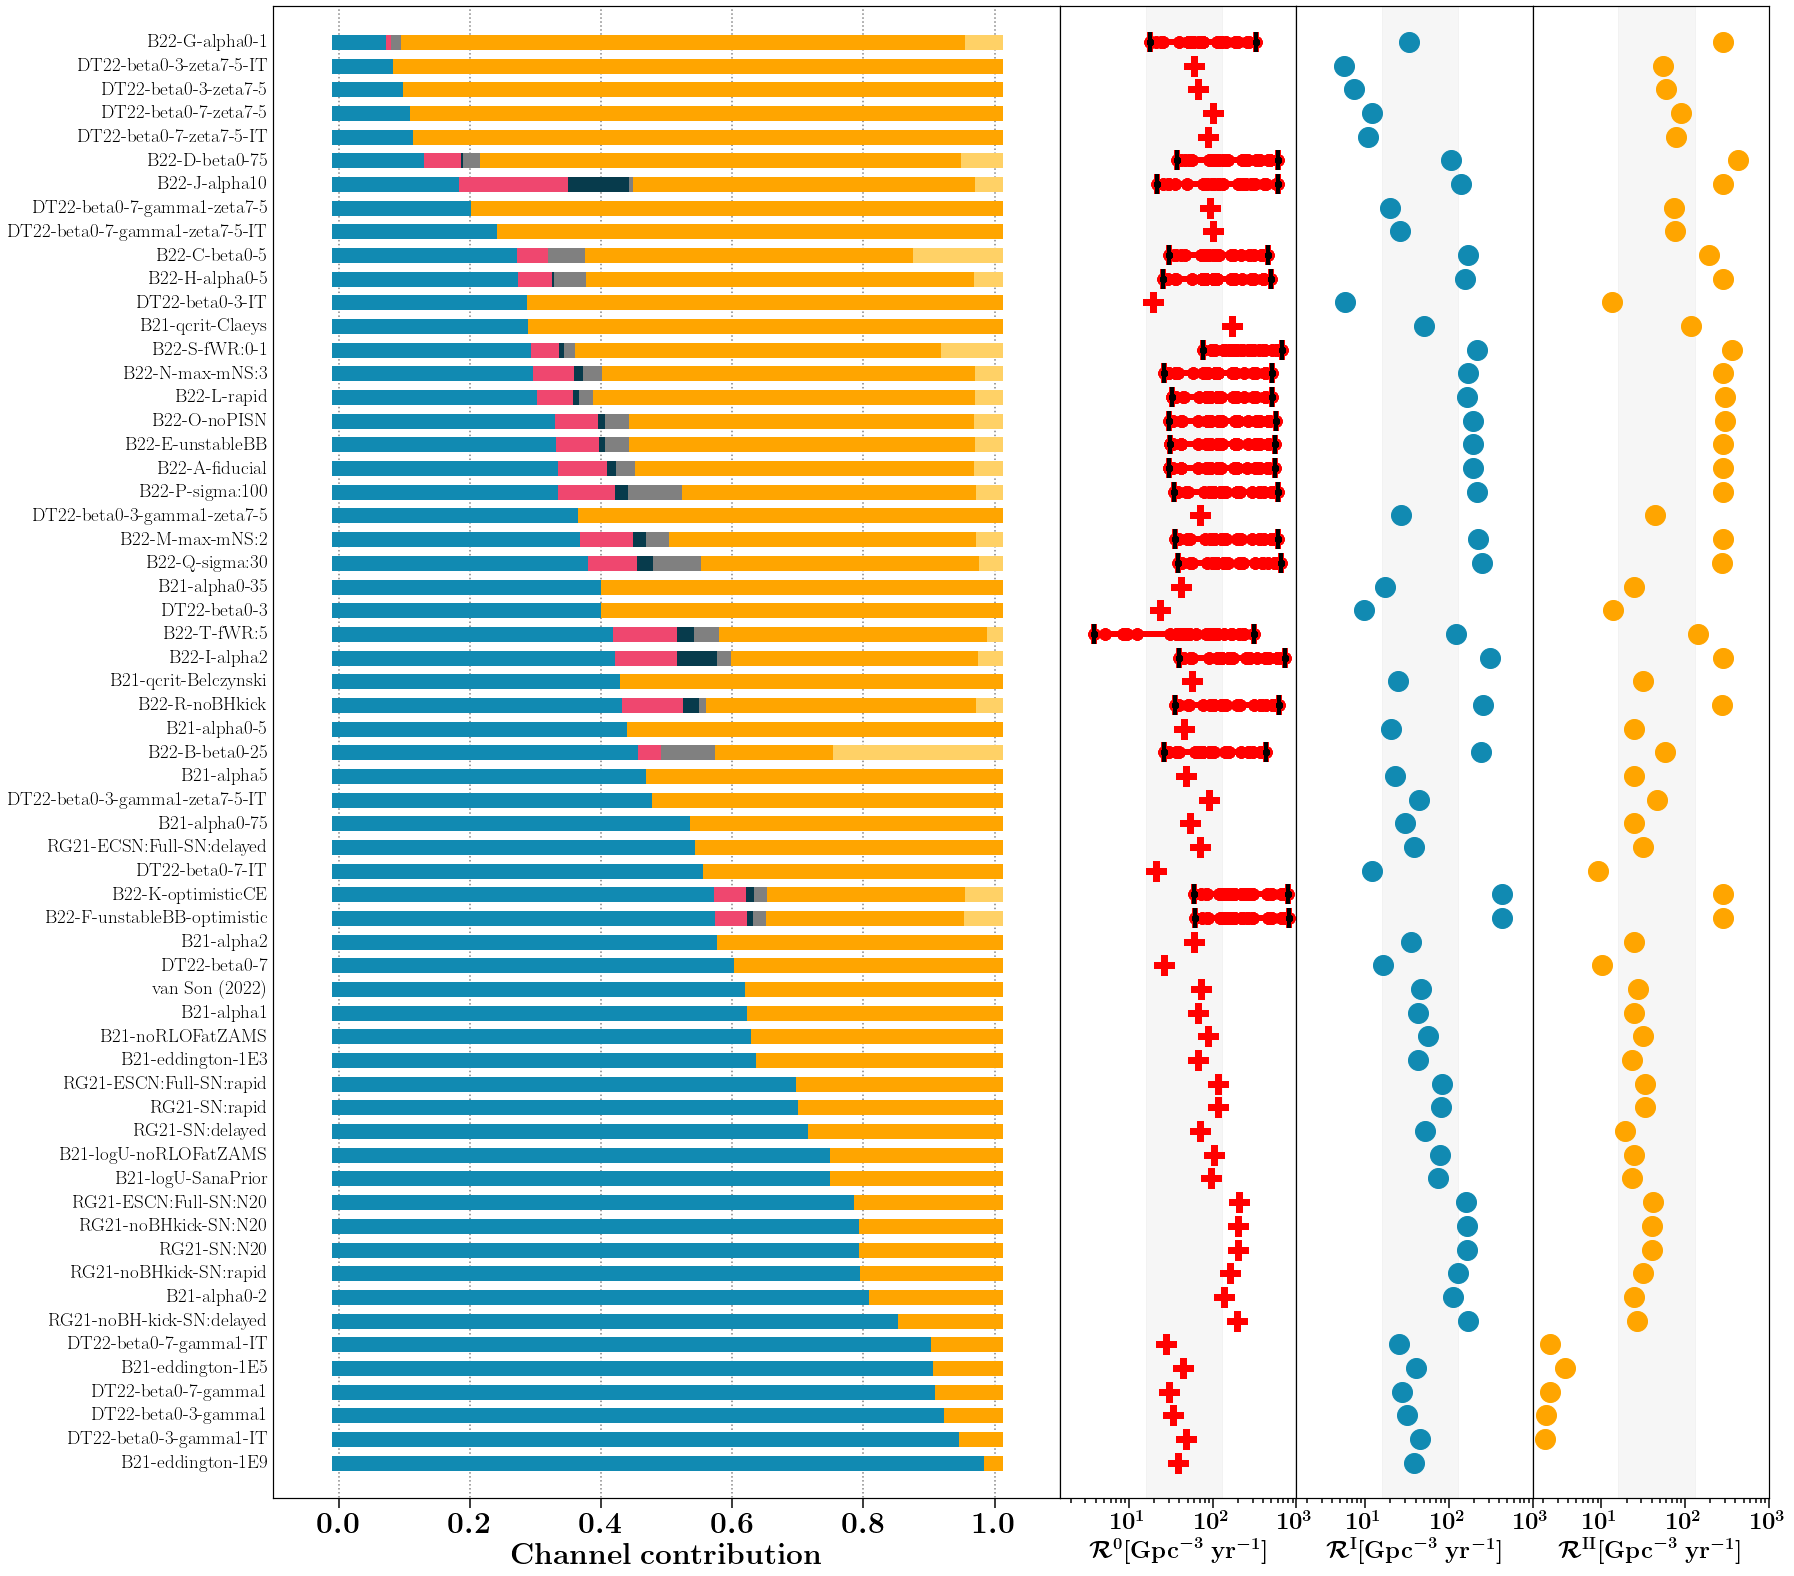

In [539]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHBH', ordered='max', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')




the total vertical length of the BHNS plot reaches: -30 this is information floor uses for deciding the length of the figure - ignore this
$\mathcal{R}^{0}$
$\mathcal{R}^{\rm{I}}$
$\mathcal{R}^{\rm{II}}$


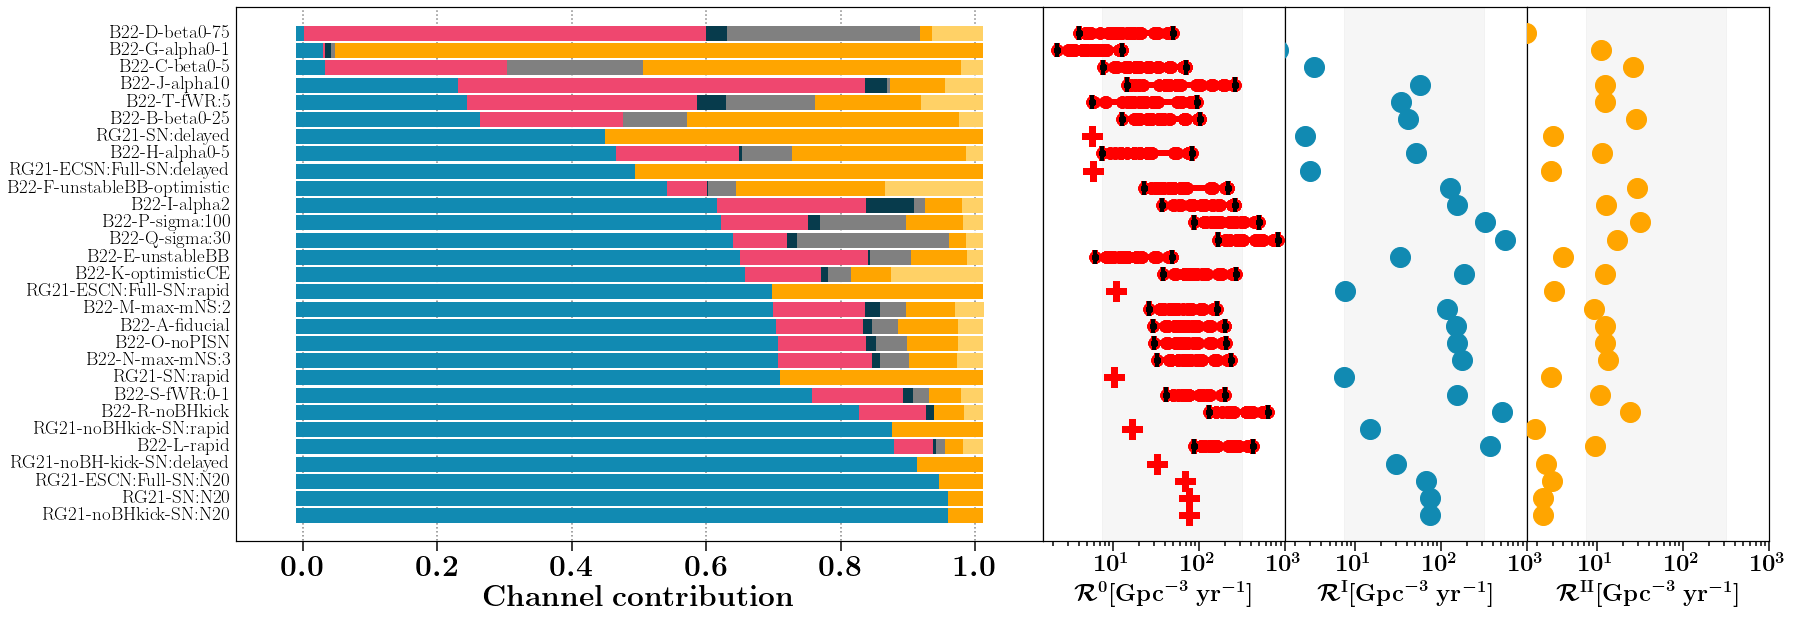

In [536]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHNS', ordered='max', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')




the total vertical length of the NSNS plot reaches: -21 this is information floor uses for deciding the length of the figure - ignore this
$\mathcal{R}^{0}$
$\mathcal{R}^{\rm{I}}$
$\mathcal{R}^{\rm{IV}}$


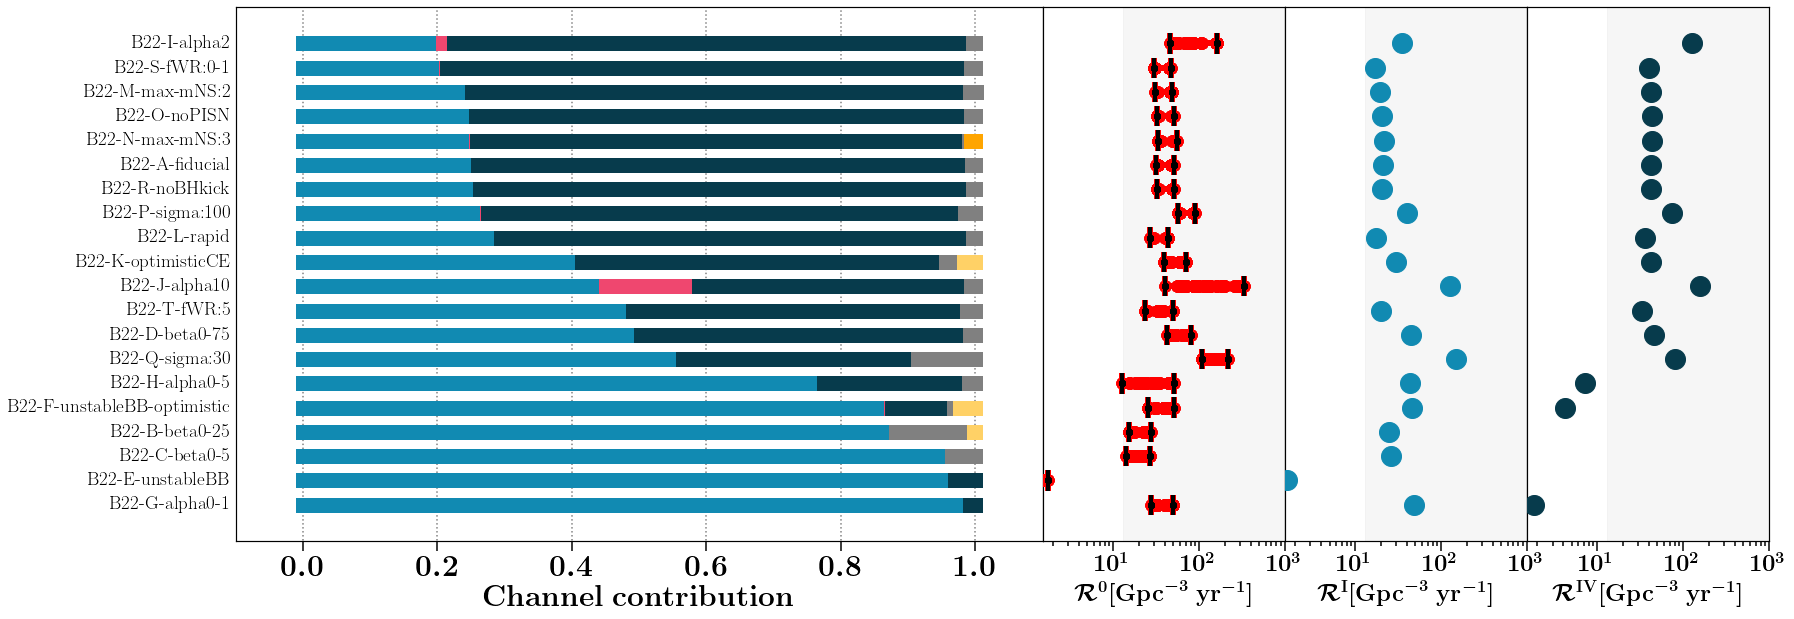

In [537]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='NSNS', ordered='max', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')




In [5]:

data = np.asarray([1,1,1,11,11,5,2,9,11])
median_ind = np.argsort(data)[len(data)//2]
min_ind = np.argsort(data)[0]
max_ind = np.argsort(data)[-1]

print(median_ind, min_ind, max_ind)


print(np.argsort(data))
print()
print((data)[min(np.argsort(data))])
print()
print((data)[median_ind])
print(100//2)

5 0 8
[0 1 2 6 5 7 3 4 8]

1

5
50


# make main figure LRR size/style:

the total vertical length of the BHBH plot reaches: -62 this is information floor uses for deciding the length of the figure - ignore this
$\mathcal{R}^{0}$
$\mathcal{R}^{\rm{I}}$
$\mathcal{R}^{\rm{II}}$


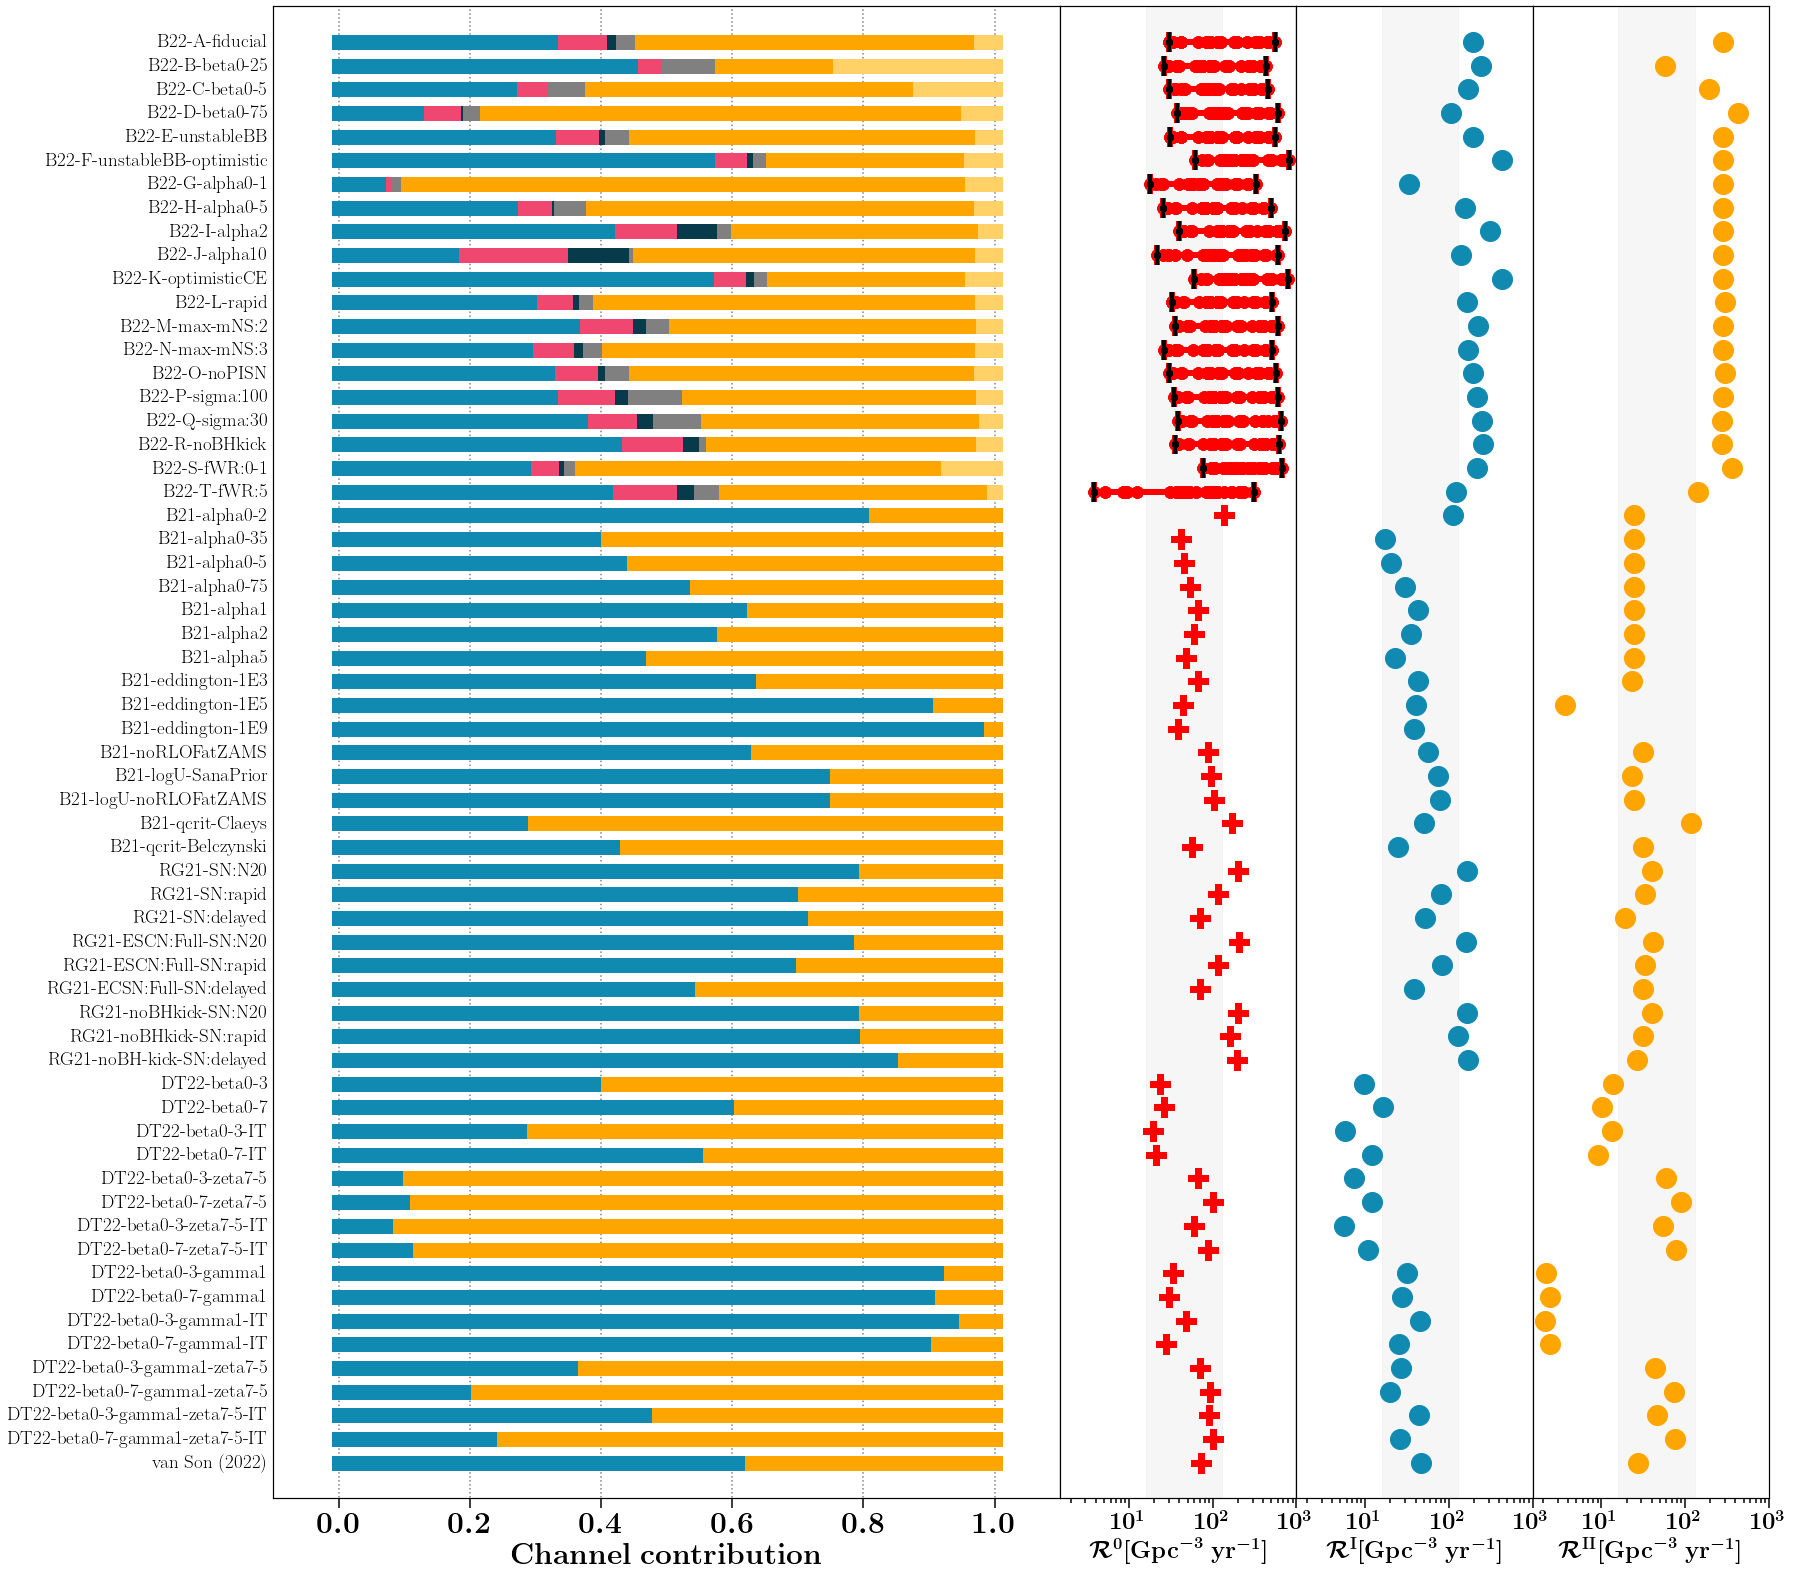

In [158]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')


the total vertical length of the BHNS plot reaches: -30 this is information floor uses for deciding the length of the figure - ignore this
$\mathcal{R}^{0}$
$\mathcal{R}^{\rm{I}}$
$\mathcal{R}^{\rm{II}}$


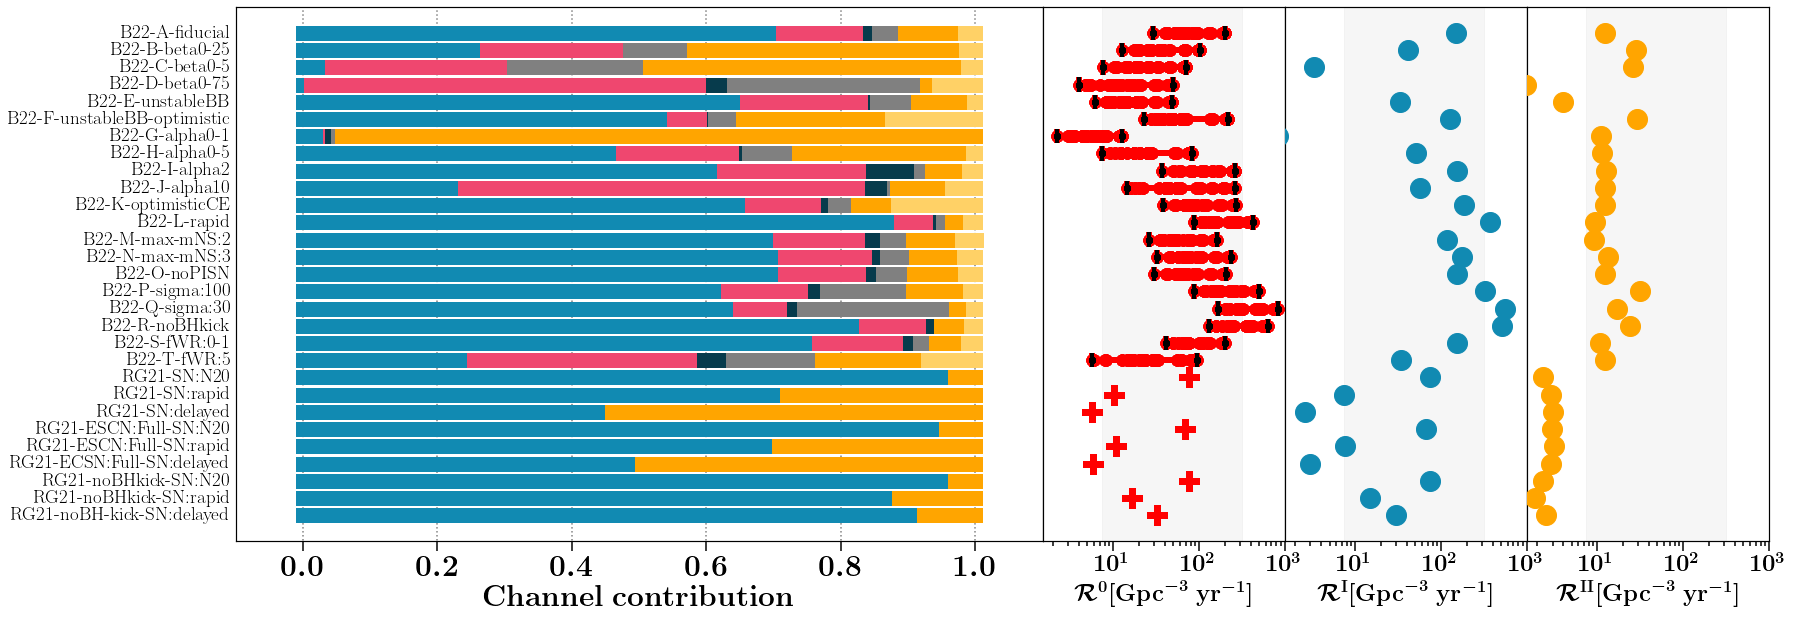

In [160]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')


the total vertical length of the NSNS plot reaches: -21 this is information floor uses for deciding the length of the figure - ignore this
$\mathcal{R}^{0}$
$\mathcal{R}^{\rm{I}}$
$\mathcal{R}^{\rm{IV}}$


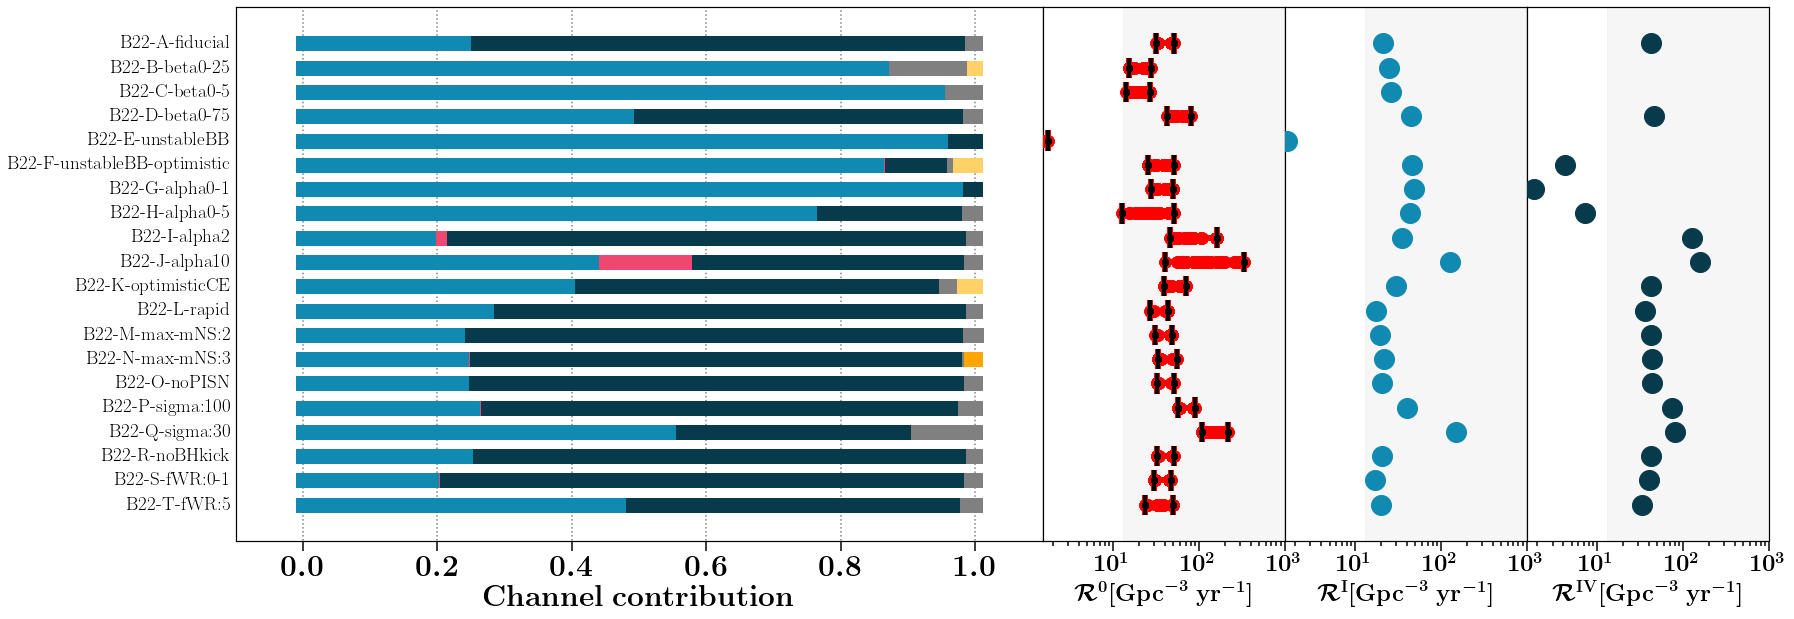

In [161]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='NSNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')


# as a rate of a parameter: 

In [516]:
def make_param_panel(axe, DCOtype='BHBH', path_to_data_directory='path_name/', which_param='alpha'):
    
    
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    names =   [DCOdirectoryPath+ which_param +'.csv']
    rate_labels = ['isolated binaries']


    whichchannel ='classic'


    df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
#     channel_colors = [ '#118AB2', '#EF476F'  , '#073B4C','gray', 'orange', '#FFD166']
#     channel_ind = [1, 4, 5, 3, 2, 6]
    
    
    
    df_name = names[0]
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8])

    df_alpha = df.iloc[:,8::8]
    df_total_rates = df.iloc[:,7::8]
    
    
    
#     channel_dict = {'classic':1, 'RLOF':2, 'caseA':2, 'all':7}
    channel_dict = {'channel_I':1, 'channel_III':4, 'channel_IV':5, 'channel_V':3,  'channel_II':2, 'channel_VII':6}
    channel_colors = { 'channel_I':'#118AB2', 'channel_III':'#EF476F'  , 'channel_IV':'#073B4C','channel_V':'gray', 'channel_II':'orange', 'channel_VII':'#FFD166'}
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    linestyles = ['--', '-.', '-', ':']
    
    for ind_channel, channel in enumerate(df_labels):
    
        ind_c = channel_dict[channel]
        df_rates = df.iloc[:,ind_c::8]

    #     print(df_rates)
        rates_columns = df_rates.columns


        ncols, nrows=1,1
        colors = sns.color_palette("husl", len(df_alpha.columns))



        for ind_n, name in enumerate(df_alpha.columns):
            values = df_alpha[name]
            rates  = df_rates[rates_columns[ind_n]] 

            mask_notna = (df_alpha[name].notna())
            alphas = values[mask_notna]    
            rates = rates[mask_notna]

            # resort in order of param values  # maybe delete 
            sort_index = np.argsort(alphas)


            marker_ind = ind_n%15
            ls_ind = ind_n%4

            
            if which_param in ['alpha']: 
                y_values_param = alphas[sort_index]
                x_values_rates  =  rates[sort_index]
            elif which_param in ['supernovae']:
                y_values_param = np.asarray([0.5,1.5])
                x_values_rates = rates
            
            axe.plot(x_values_rates, y_values_param, linestyle=linestyles[ls_ind], lw=6, c=channel_colors[channel], zorder=9)
            axe.scatter(x_values_rates, y_values_param, marker=markershapes[ind_n], s=200, c='k', zorder=10)


    if which_param in ['alpha']:
        axe.set_yscale('log')
#     axe.set_xscale('log')
    axe.set_xlim(0, 1)
    
    return
        
    
    
    
    
def make_param_panel_rates(axe, DCOtype='BHBH', path_to_data_directory='path_name/', which_channel='name_channel', which_param='alpha'):
    
    
    ## constants ##
    channel_dict = {'channel_I':1, 'channel_III':4, 'channel_IV':5, 'channel_V':3,  'channel_II':2, 'channel_VII':6, 'all':7}
    channel_colors = { 'channel_I':'#118AB2', 'channel_III':'#EF476F'  , 'channel_IV':'#073B4C','channel_V':'gray', 'channel_II':'orange', 'channel_VII':'#FFD166', 'all':'k'}
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    linestyles = ['--', '-.', '-', ':']
    df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
    ## 
    
    
    # warm up 
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    names =   [DCOdirectoryPath+ which_param +'.csv']
    
    
    
    # read in global data 
    df_name = names[0]
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8])

    df_alpha = df.iloc[:,8::8]
    df_total_rates = df.iloc[:,7::8]
    
    
    ind_c = channel_dict[which_channel]
    df_rates = df.iloc[:,ind_c::8]

    rates_columns = df_rates.columns


    ncols, nrows=1,1
    colors = sns.color_palette("husl", len(df_alpha.columns))



    for ind_n, name in enumerate(df_alpha.columns):
        # channel rates 
        values = df_alpha[name]
        rates  = df_rates[rates_columns[ind_n]] 
        
        mask_notna = (df_alpha[name].notna())
        alphas = values[mask_notna]    
        rates = rates[mask_notna]
        
        # total rates
        total_name = df_total_rates.columns[ind_n]
        total_rates = df_total_rates[total_name]
        total_rates = total_rates[mask_notna]
        

        # resort in order of param values  # maybe delete 
        sort_index = np.argsort(alphas)
        ordered_alphas = alphas[sort_index]
        
        if which_channel=='all':
            ordered_rates  =  (total_rates)[sort_index]
        else:
            ordered_rates  =  (rates*total_rates)[sort_index]
#         print()
#         print('----------')
#         print('fraction, total rate, total frac rate')
#         print(rates)
#         print(total_rates)
#         print(rates*total_rates)
#         print()
        

        marker_ind = ind_n%15
        ls_ind = ind_n%7


        axe.plot(ordered_rates, ordered_alphas, linestyle=linestyles[ls_ind], lw=6, c=channel_colors[which_channel], zorder=9)
        axe.scatter(ordered_rates, ordered_alphas, marker=markershapes[ind_n], s=200, c='k', zorder=10)


        
    axe.set_yscale('log')
    axe.set_xscale('log')
#     axe.set_xlim(0, 1)
    
    return





# DESCRETE 

In [517]:
# # DESCRETE 

        

def make_param_panel_rates_discrete(axe, DCOtype='BHBH', path_to_data_directory='path_name/', which_channel='name_channel', which_param='alpha'):
    
    
    ## constants ##
    channel_dict = {'channel_I':1, 'channel_III':4, 'channel_IV':5, 'channel_V':3,  'channel_II':2, 'channel_VII':6, 'all':7}
    channel_colors = { 'channel_I':'#118AB2', 'channel_III':'#EF476F'  , 'channel_IV':'#073B4C','channel_V':'gray', 'channel_II':'orange', 'channel_VII':'#FFD166', 'all':'k'}
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    linestyles = ['--', '-.', '-', ':']
    df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
    ## 
    
    
    # warm up 
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    names =   [DCOdirectoryPath+ which_param +'.csv']
    
    
    
    # read in global data 
    df_name = names[0]
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8])

    df_alpha = df.iloc[:,8::8]
    df_total_rates = df.iloc[:,7::8]
    
    
    ind_c = channel_dict[which_channel]
    df_rates = df.iloc[:,ind_c::8]

    rates_columns = df_rates.columns


    ncols, nrows=1,1
    colors = sns.color_palette("husl", len(df_alpha.columns))



    for ind_n, name in enumerate(df_alpha.columns):
        # channel rates 
        values = df_alpha[name]
        rates  = df_rates[rates_columns[ind_n]] 
        
        mask_notna = (df_alpha[name].notna())
        alphas = values[mask_notna]    
        rates = rates[mask_notna]
        
        # total rates
        total_name = df_total_rates.columns[ind_n]
        total_rates = df_total_rates[total_name]
        total_rates = total_rates[mask_notna]
    
        
        if which_channel=='all':
            rates  =  (total_rates)
        else:
            rates  =  (rates*total_rates)

        

        marker_ind = ind_n%15
        ls_ind = ind_n%4

        y_discrete = np.asarray([0.5,1.5])
        
#         print(rates)
#         print(y_discrete)
#         print(line)
        axe.plot(rates, y_discrete, linestyle=linestyles[ls_ind], lw=6, c=channel_colors[which_channel], zorder=9)
        axe.scatter(rates, y_discrete, marker=markershapes[ind_n], s=200, c='k', zorder=10)


        
#     axe.set_yscale('log')

    
    return

In [518]:

def make_figure_param(DCOtype='BHNS', ordered='max', plotmedians=False, path_to_data_directory='path/', version='ArXiv', which_param='alpha', ylim=[0.1, 10]):
    
    cm = 1/2.54
    ncols, nrows=4,1
    
    # all data files are structured (in path / file name ) to start with the following
#     DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    v_height_BBH = 114  # obtained from the printed information, used to scale the length of the figures 

            
    d2 = 10
    d1 = 25 # overwrite 
    
    w_small = 0.3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[1, w_small, w_small, w_small], "height_ratios":[1]})     
    
    
    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
   

##     plotDCOfractions(axe=axes[0], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version)
#     make_up_axes(axes[0], DCOtype, df_names=names,ordered=ordered, version=version)


    if which_param in ['alpha']:
        make_param_panel(axe=axes[0], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_param=which_param)
        make_up_axes_ratios_param(axe=axes[0], DCOtype=DCOtype, which_param=which_param, ylim=ylim)



        make_param_panel_rates(axe=axes[1],  DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='all', which_param=which_param)
        make_up_axes_rates_param(axe=axes[1], DCOtype=DCOtype, which_channel='all', which_param=which_param, ylim=ylim)  


        make_param_panel_rates(axe=axes[2], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_I', which_param=which_param)
        make_up_axes_rates_param(axe=axes[2], DCOtype=DCOtype, which_channel='channel_I', which_param=which_param, ylim=ylim)  


        make_param_panel_rates(axe=axes[3], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_II', which_param=which_param)
        make_up_axes_rates_param(axe=axes[3], DCOtype=DCOtype, which_channel='channel_II', which_param=which_param, ylim=ylim)  

    elif which_param in ['supernovae']:
        
        make_param_panel(axe=axes[0], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory,  which_param=which_param)
        make_up_axes_ratios_param(axe=axes[0], DCOtype=DCOtype, which_param=which_param, ylim=ylim)



        make_param_panel_rates_discrete(axe=axes[1],  DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='all', which_param=which_param)
        make_up_axes_rates_param(axe=axes[1], DCOtype=DCOtype, which_channel='all', which_param=which_param, ylim=ylim)  


        make_param_panel_rates_discrete(axe=axes[2], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_I', which_param=which_param)
        make_up_axes_rates_param(axe=axes[2], DCOtype=DCOtype, which_channel='channel_I', which_param=which_param, ylim=ylim)  


        make_param_panel_rates_discrete(axe=axes[3], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_II', which_param=which_param)
        make_up_axes_rates_param(axe=axes[3], DCOtype=DCOtype, which_channel='channel_II', which_param=which_param, ylim=ylim)  
    
    
    else:
        print('Erorr which param given incorrect')
    
    

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    
    
#     plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' + '_' + which_param +'_'+ 'versionLRR.png', dpi=300, transparent=False)#,\
#     plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' + '_' + which_param +'_'+ 'versionLRR.pdf')#,\    


    plt.show()

    plt.close()    
    
    
    




In [531]:







def make_up_axes_rates_param(axe=None, DCOtype='BHNS',  df_names=['a', 'b'], ordered=None, version='ArXiv', which_channel='all', which_param='alpha', ylim=[0.1,10]):
    """ creates several things that are axes related"""
    
    
    

    NSNSrate0 = [13.0, 1900.0] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533 and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    BHBHrate0 = [16.0, 130.0] #for minimum and maximum of possible local merger rates estimates,  and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    BHNSrate0 = [7.4,  320.0] # min and max range from the two estimates based on GW200115 and GW200105
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    ind_obs = {'BHNS':1, 'BHBH':0, 'NSNS':2, 'BBH':0, 'BNS':2}
    xmin,xmax = 1.5, 0.45*1E3

    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    
    dict_xlabel = {'all':r'$\mathcal{R}^{0}$', 'channel_I':r'$\mathcal{R}^{\rm{I}}$', 'channel_III':r'$\mathcal{R}^{\rm{III}}$',  'channel_IV':r'$\mathcal{R}^{\rm{IV}}$', 'channel_V':r'$\mathcal{R}^{\rm{V}}$',  'channel_II':r'$\mathcal{R}^{\rm{II}}$', 'channel_VII':r'$\mathcal{R}^{\rm{IIb}}$'}

    xlabel = dict_xlabel[which_channel] +  r'$[\rm{Gpc}^{-3} \ \rm{yr}^{-1}] $'
            
        
    # if plotting intrinsic, add the local detected merger rates inferred from obesrvations. 
#     if whichRate=='intrinsic':
    if which_param in ['alpha']:
        xx = np.linspace(ylim[0]/10,  ylim[1]*10, 10)
    else: 
        xx = np.linspace(ylim[0]-1,  ylim[1]+1, 10)
    min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][0]
    max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][1]
    axe.fill_betweenx(y=xx, x1=min_obs_rate, x2=max_obs_rate, alpha=0.2, color='lightgray', zorder=1)

    axe.set_yticks([])

    
    axe.set_xlim(xmin, xmax)
    axe.set_xscale('log')
#     axe.set_yscale('log')
    axe.set_ylim(ylim[0], ylim[1])
    
#     if version=='ArXiv':
#         # add x labels on top
#         ax2x = axe.twiny()
#         # ax2x.set_xscale('log')   
#         ax2x.set_xlim(xmin, xmax)
#         ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs, setMinor=False, second=True, labelpad=20)
    
    
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'NA', fontsize=fs, setMinor=False, labelpad=4)

    return 




def make_up_axes_ratios_param(axe=None, DCOtype='BHNS',  version='ArXiv', which_param='alpha', ylim=[0.1,10]):
    """ creates several things that are axes related"""

    xmin,xmax = 0, 1.1
    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    xlabel = r'$\rm{Channel } \ \textbf{contribution} $'
    ylabel_dict = {'alpha':r'$\alpha_{\rm{CE}}$'}

    
    axe.set_xlim(xmin, xmax)
    axe.set_ylim(ylim[0], ylim[1])
#     axe.set_yticks([])
    print('getting here')
    
    
#     if version=='ArXiv':
#         # add x labels on top
#         ax2x = axe.twiny()
#         # ax2x.set_xscale('log')   
#         ax2x.set_xlim(xmin, xmax)
#         ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, second=True, labelpad=20)
    if which_param in ['alpha']:
        
    
        ylabel = ylabel_dict[which_param]
        
        axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs+6, setMinor=False, labelpad=4)
    else:
        axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY='X', fontsize=fs+6, setMinor=False, labelpad=4) 
        axe.set_yticks([0.5, 1.5])
        physical_names = [r'$\rm{DELAYED}$', r'$\rm{RAPID}$']
        
        axe.set_yticklabels(physical_names,  fontsize=fs) #rotation=55,
    
    return 


   
    
    

# def make_up_axes_ratios_param_discrete(axe=None, DCOtype='BHNS',  version='ArXiv', which_param='alpha', ylim=[0.1,10]):
#     """ creates several things that are axes related"""

#     xmin,xmax = 0, 1.1
#     DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
#     xlabel = r'$\rm{Channel } \ \textbf{contribution} $'
    
#     ylabel_dict = {'alpha':r'$\alpha_{\rm{CE}}$'}
#     ylabel = ylabel_dict[which_param]
    
#     axe.set_xlim(xmin, xmax)
#     axe.set_ylim(ylim[0], ylim[1])
# #     axe.set_yticks([])
#     print('getting here')
    
    
# #     if version=='ArXiv':
# #         # add x labels on top
# #         ax2x = axe.twiny()
# #         # ax2x.set_xscale('log')   
# #         ax2x.set_xlim(xmin, xmax)
# #         ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, second=True, labelpad=20)
    
#     axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs+6, setMinor=False, labelpad=4)
# #     axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY='X', fontsize=fs+6, setMinor=False, labelpad=4) 
    
#     return     

    

getting here


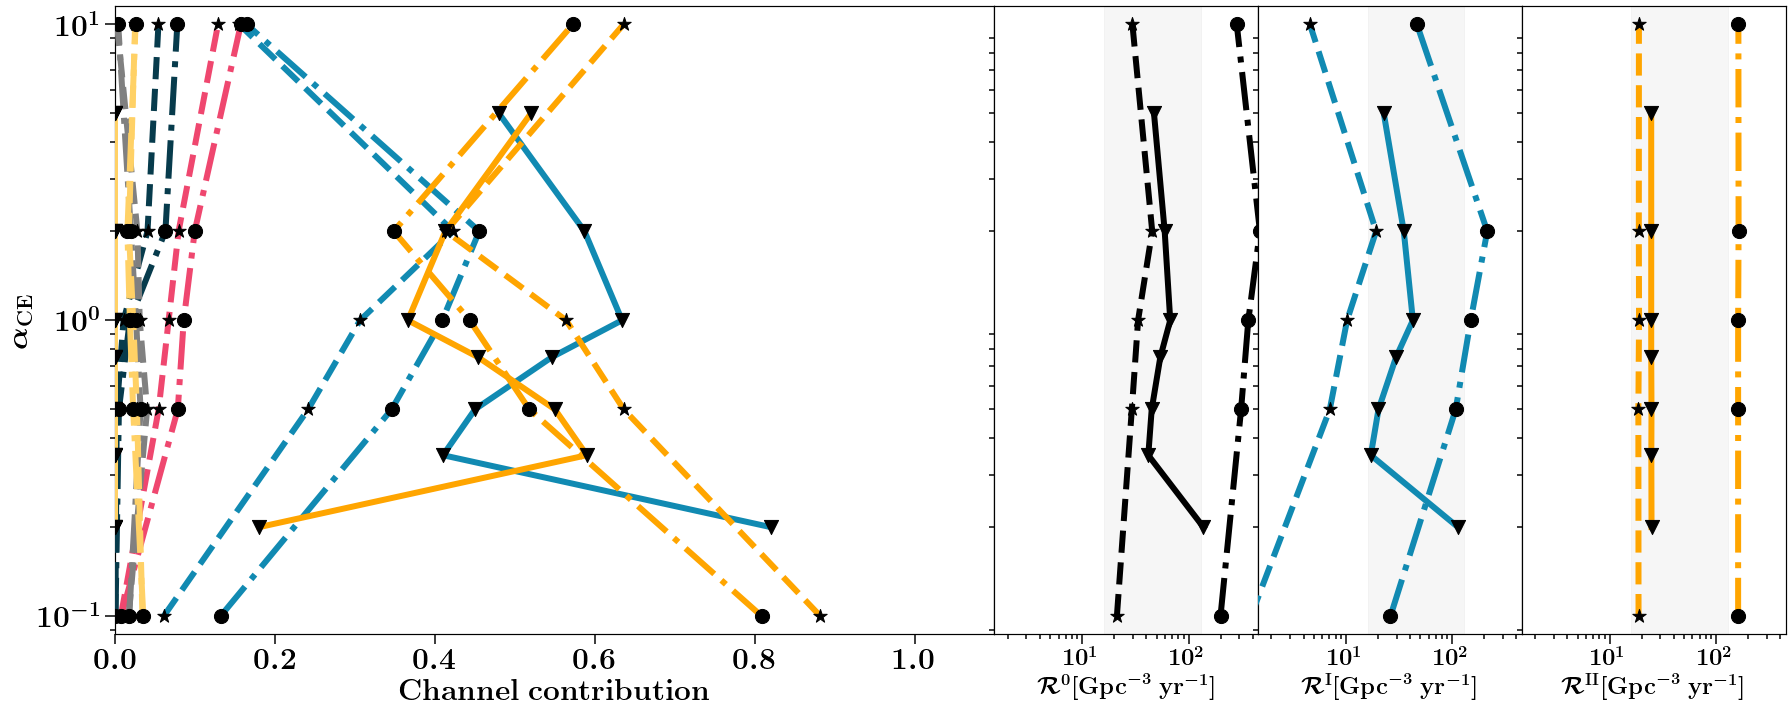

In [532]:
# make the BH-BH rates comparison figure 
make_figure_param(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR', which_param='alpha', ylim=[0.1/1.15,10*1.15])


getting here


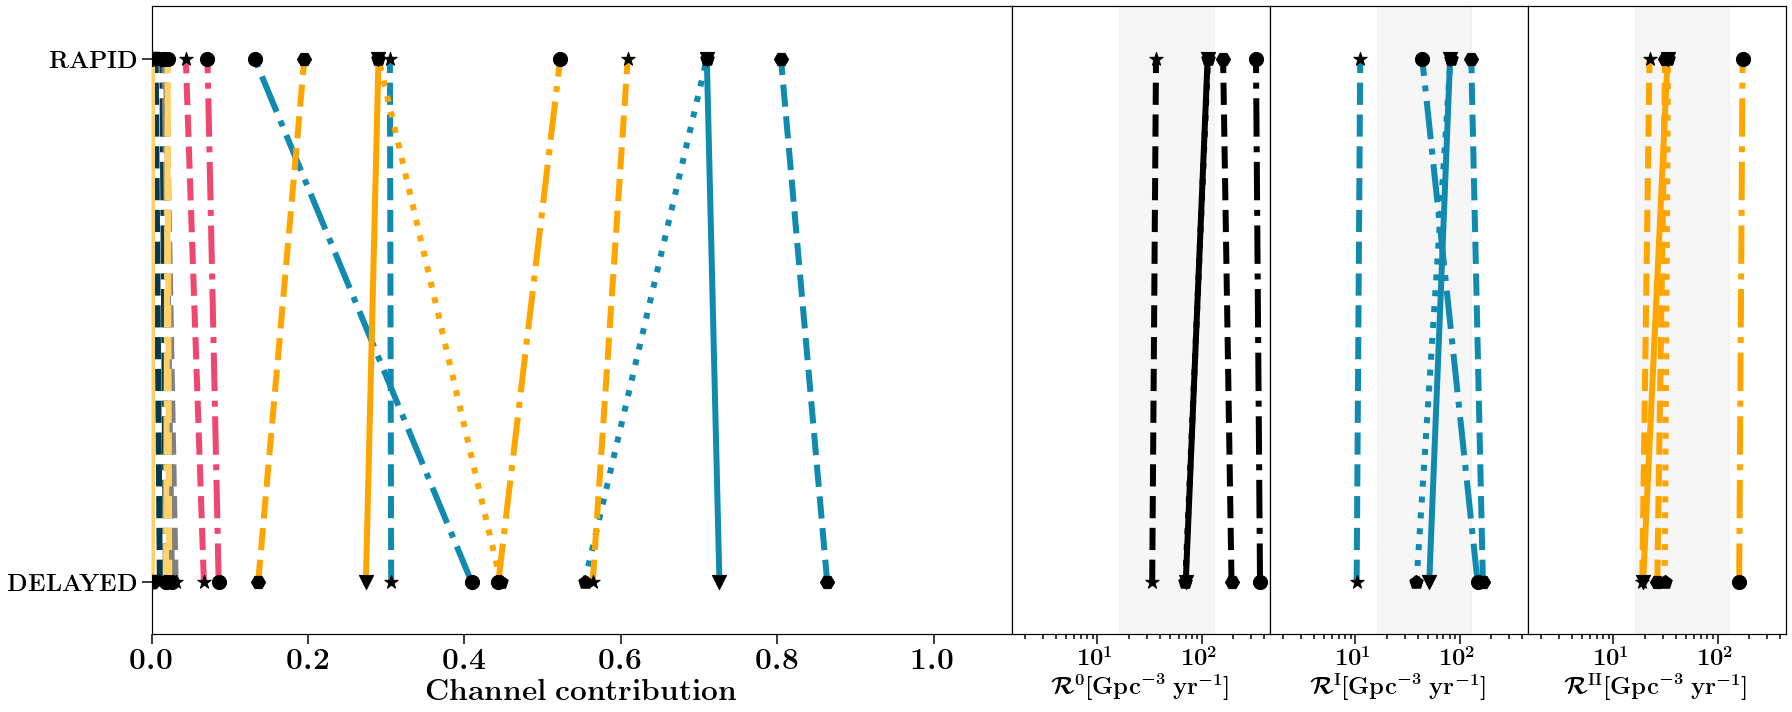

In [533]:
# make the BH-BH rates comparison figure 
make_figure_param(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR', which_param='supernovae', ylim=[0.4,1.6])


In [ ]:
         
#         print('-- printing x and y values before order--')
#         print(alphas)
#         print(rates)
#         print()
#         print()
#         if (whichrate=='total') & (whichchannel!='all'):
#             rates = rates * df_total_rates[df_total_rates.columns[ind_n]][mask_notna]
               
#         if len(values)>0:
            
#             if whichplot=='noDevision':
#                 print(ordered_rates)
#                 axe.scatter(alphas[0],  rates[0], s=1005, c=[colors[ind_n]], zorder=10, marker='*')
#                 axe.plot(ordered_alphas, ordered_rates, c=colors[ind_n], lw=3.3, zorder=1, label=name)
#                 axe.scatter(ordered_alphas, ordered_rates, c='k', s=70, zorder=2, marker=markershapes[marker_ind])

            
#             else:
# #                 print(ordered_rates)
# #                 print(rates[0])
#                 axe.scatter(alphas[0],  rates[0]/rates[0], s=1005, c=[colors[ind_n]], zorder=10, marker='*')
#                 axe.plot(ordered_alphas, ordered_rates/rates[0], c=colors[ind_n], lw=3.3, zorder=1, label=name)
#                 axe.scatter(ordered_alphas, ordered_rates/rates[0], c='k', s=70, zorder=2, marker=markershapes[marker_ind])


#     if whichchannel =='all':
#         text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
#     else:
#         text_DCO = r'\textbf{%s}'%whichchannel + '\n' + r'\textbf{merger rates}'
        
#     textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)



#     axe.text(0.05, 0.91, s=text_DCO, rotation = 0, fontsize = fs+8, color =DCOtypeColorsDict[DCOtype], ha = 'left', va='top',\
#              transform=axe.transAxes, weight = 'bold', bbox=textbox_props)  


#     make_up_axes(axe=axe, DCOtype=DCOtype, df='None', whichrate=whichrate, whichplot=whichplot, which_param=which_param, xlim=xlim, ylim=ylim, logX=logX, logY=logY)

#     lgd = f.legend(fontsize=fs, ncol=4,\
#                          bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  


#     plt.tight_layout()
#     plt.subplots_adjust(wspace=0, hspace=0)#2)
#     plt.savefig('./Rates_' +DCOtype + '_'+which_param+'.png', dpi=300, transparent=False)#,\
#     plt.savefig('./Rates_' +DCOtype + '_'+which_param+'.pdf',  bbox_extra_artists=(lgd,), bbox_inches='tight')
#     plt.show()

#     plt.close()          
